In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8) #Customizes the size of the plot.

In [4]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1XyQNPnGn_CsJaR1s7CAemN6zoJZgCBzM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Combined.csv')

In [5]:
#read data

df = pd.read_csv('Combined.csv')

df.head()

,geo,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Median Sale Price of a Home ($ Dollars),Local Personal Income Tax Rate (%),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes)
0,Allegany County,70975,31984,1764,43535,90829,3.05%,18.3,21.3
1,Anne Arundel County,576031,309603,10343,97051,338287,2.81,40.9,30.7
2,Baltimore City,602495,289758,16454,50501,139723,3.2,31.2,31.0
3,Baltimore County,828431,450366,18202,75836,238426,3.2,38.6,29.6
4,Calvert County,92003,49121,1739,106270,318471,3,31.1,41.7


In [6]:
#renaming columns

df = df.rename(columns={'Median Household Income ($ Dollars)': 'Median Household Income(USD)', 'Median Sale Price of a Home ($ Dollars)':'Median House Sale Price(USD)'})
df.head()

,geo,"Total Population, 2018",Labor Force,Unemployment,Median Household Income(USD),Median House Sale Price(USD),Local Personal Income Tax Rate (%),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes)
0,Allegany County,70975,31984,1764,43535,90829,3.05%,18.3,21.3
1,Anne Arundel County,576031,309603,10343,97051,338287,2.81,40.9,30.7
2,Baltimore City,602495,289758,16454,50501,139723,3.2,31.2,31.0
3,Baltimore County,828431,450366,18202,75836,238426,3.2,38.6,29.6
4,Calvert County,92003,49121,1739,106270,318471,3,31.1,41.7


In [7]:
#checking missing data

df.isna().sum()

geo                                      0
Total Population, 2018                   0
Labor Force                              0
Unemployment                             0
Median Household Income(USD)             0
Median House Sale Price(USD)             0
Local Personal Income Tax Rate (%)       0
Bachelor's Degree Attainment (%)         0
Average Travel Time to Work (Minutes)    0
dtype: int64

In [8]:
#drop any duplicates

df.drop_duplicates()

,geo,"Total Population, 2018",Labor Force,Unemployment,Median Household Income(USD),Median House Sale Price(USD),Local Personal Income Tax Rate (%),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes)
0,Allegany County,70975,31984,1764,43535,90829,3.05%,18.3,21.3
1,Anne Arundel County,576031,309603,10343,97051,338287,2.81,40.9,30.7
2,Baltimore City,602495,289758,16454,50501,139723,3.2,31.2,31.0
3,Baltimore County,828431,450366,18202,75836,238426,3.2,38.6,29.6
4,Calvert County,92003,49121,1739,106270,318471,3,31.1,41.7
5,Caroline County,33304,18028,688,56627,181574,3.2,16.9,32.9
6,Carroll County,168429,94339,3062,95956,316458,3.03,35.6,35.9
7,Cecil County,102826,52632,2317,72739,225308,3,22.8,29.6
8,Charles County,161503,85104,3299,92616,295354,3.03,28.9,44.4
9,Dorchester County,31998,15347,799,48682,169719,3.2,20.8,27.0


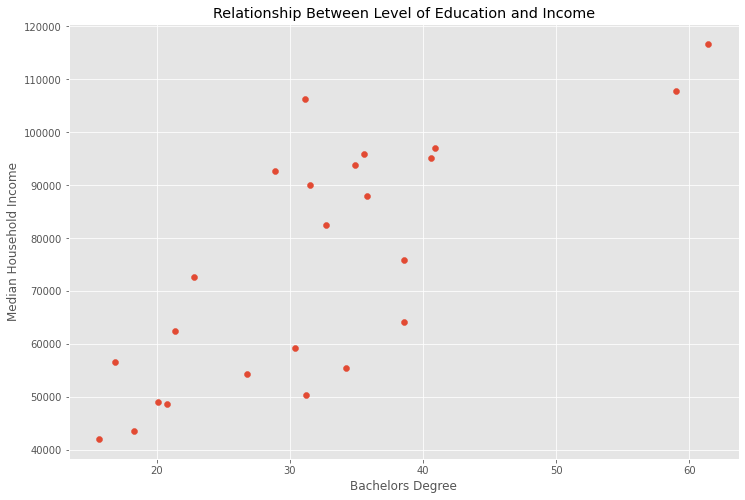

In [9]:
#scatter plot between level of education and median household income

plt.scatter(x = df["Bachelor's Degree Attainment (%)"], y = df["Median Household Income(USD)"])
plt.title('Relationship Between Level of Education and Income')
plt.xlabel("Bachelors Degree")
plt.ylabel('Median Household Income')
plt.show()

Text(0.5, 1.0, 'Relationship Between Level of Education and Income')

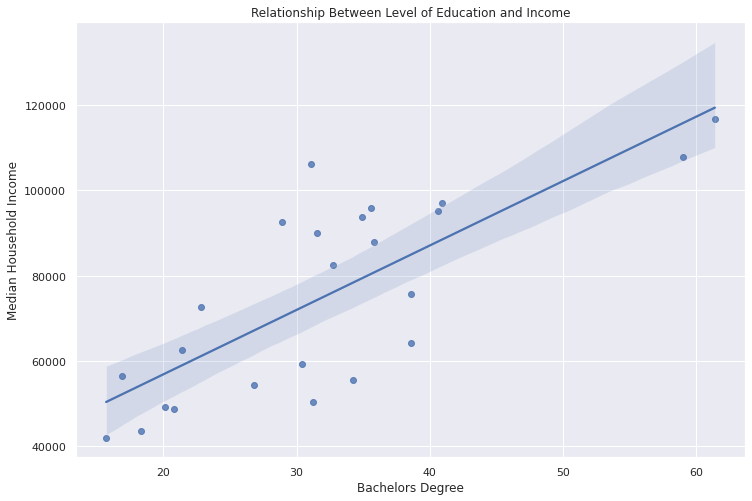

In [10]:
#Plotting a regression plot
sns.set_theme(color_codes=True)
reg = sns.regplot(x="Bachelor's Degree Attainment (%)", y="Median Household Income(USD)", data=df)
reg.set(xlabel = "Bachelors Degree", ylabel = "Median Household Income")
reg.set_title("Relationship Between Level of Education and Income")

**Observation:**

`There is a positive relation between education and the income. The counties which have higher level of Bachelor's degree attainment has a higher median household income as well.`

Text(0.5, 1.0, 'Relationship Between Level of Education and Unemployment')

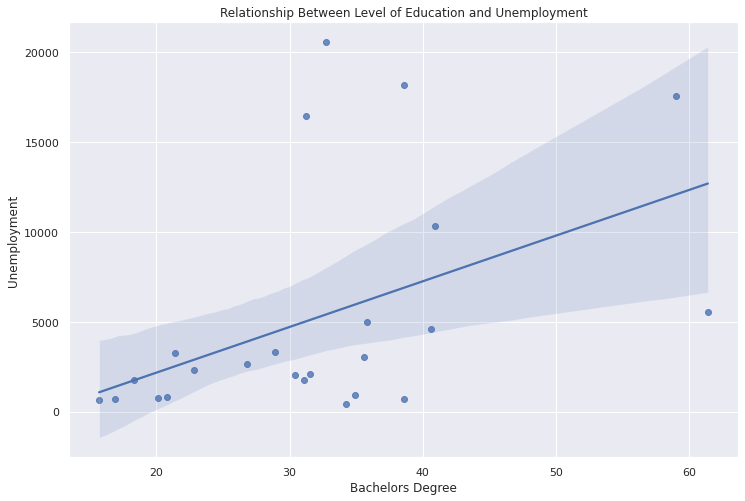

In [11]:
#Relationship between education and unemployment

reg2 = sns.regplot(x="Bachelor's Degree Attainment (%)", y="Unemployment", data=df)
reg2.set(xlabel = "Bachelors Degree", ylabel = "Unemployment")
reg2.set_title("Relationship Between Level of Education and Unemployment")

**Observation:**

`From a general perspective, this is unlikely that there would be a positive relationship between Education and Unemployment. This result is most likely due to the absolute values of the unemployed people in the larger counties of Maryland. As counties with higher population would have relatively higher number of unemployed people as well. So, it would be more appropiate to test this using the percentage of unemployed people rather than plotting the absolute values.`







In [30]:
#Calculating the percentage of Unemployemnt

df["Unemployment(%)"] = (df["Unemployment"]/df["Total Population, 2018"])*100

df

,geo,"Total Population, 2018",Labor Force,Unemployment,Median Household Income(USD),Median House Sale Price(USD),Local Personal Income Tax Rate (%),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes),Unemployment(%)
0,Allegany County,70975,31984,1764,43535,90829,3.05%,18.3,21.3,2.485382
1,Anne Arundel County,576031,309603,10343,97051,338287,2.81,40.9,30.7,1.795563
2,Baltimore City,602495,289758,16454,50501,139723,3.2,31.2,31.0,2.730977
3,Baltimore County,828431,450366,18202,75836,238426,3.2,38.6,29.6,2.197165
4,Calvert County,92003,49121,1739,106270,318471,3,31.1,41.7,1.890156
5,Caroline County,33304,18028,688,56627,181574,3.2,16.9,32.9,2.065818
6,Carroll County,168429,94339,3062,95956,316458,3.03,35.6,35.9,1.817977
7,Cecil County,102826,52632,2317,72739,225308,3,22.8,29.6,2.253321
8,Charles County,161503,85104,3299,92616,295354,3.03,28.9,44.4,2.042687
9,Dorchester County,31998,15347,799,48682,169719,3.2,20.8,27.0,2.497031


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Allegany County'),
  Text(1, 0, 'Anne Arundel County'),
  Text(2, 0, 'Baltimore City'),
  Text(3, 0, 'Baltimore County'),
  Text(4, 0, 'Calvert County'),
  Text(5, 0, 'Caroline County'),
  Text(6, 0, 'Carroll County'),
  Text(7, 0, 'Cecil County'),
  Text(8, 0, 'Charles County'),
  Text(9, 0, 'Dorchester County'),
  Text(10, 0, 'Frederick County'),
  Text(11, 0, 'Garrett County'),
  Text(12, 0, 'Harford County'),
  Text(13, 0, 'Howard County'),
  Text(14, 0, 'Kent County'),
  Text(15, 0, 'Montgomery County'),
  Text(16, 0, "Prince George's County"),
  Text(17, 0, "Queen Anne's County"),
  Text(18, 0, "St. Mary's County"),
  Text(19, 0, 'Somerset County'),
  Text(20, 0, 'Talbot County'),
  Text(21, 0, 'Washington County'),
  Text(22, 0, 'Wicomico County'),
  Text(23, 0, 'Worcester County')])

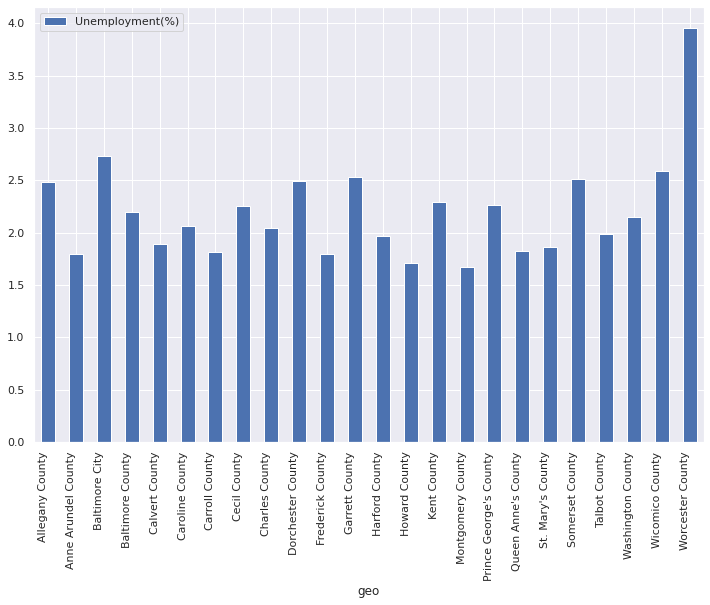

In [31]:
df.plot.bar(x = 'geo', y='Unemployment(%)', rot=0)
plt.xticks(rotation=90, ha='right')

**Observation:**

`Worcester county has the highest (3.955773%)` & `Montgomery county has the lowest (1.668302%)` unemployment rate.

Text(0.5, 1.0, 'Relationship Between Level of Education and Unemployment')

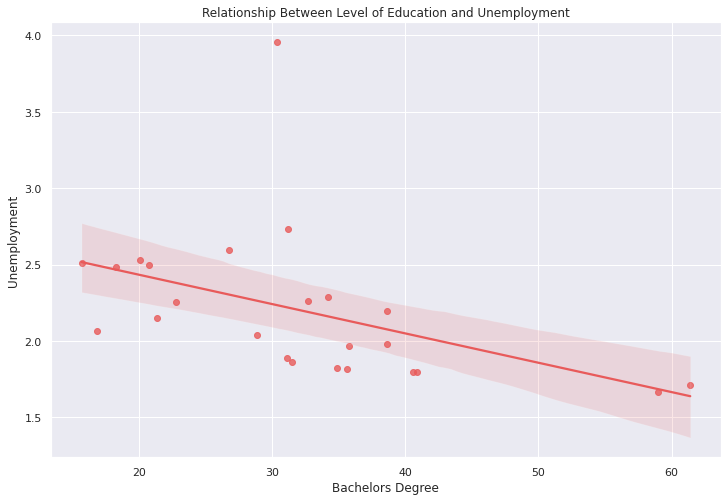

In [13]:
#Testing out the relationship between education and percentage of unemployment again

reg3 = sns.regplot(x="Bachelor's Degree Attainment (%)", y="Unemployment(%)", data=df, scatter_kws={'color': '#e85a5a'}, line_kws= {'color': '#e85a5a'})
reg3.set(xlabel = "Bachelors Degree", ylabel = "Unemployment")
reg3.set_title("Relationship Between Level of Education and Unemployment")

**Observations:**

As we can see, as more people attained Bachelor's degree, unemployed rate continued to drop.

In [32]:
#Looking at correaltion

corr_matrix= df.corr()

corr_matrix

,"Total Population, 2018",Labor Force,Unemployment,Median Household Income(USD),Median House Sale Price(USD),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes),Unemployment(%)
"Total Population, 2018",1.000000,0.998585,0.976217,0.388203,0.388325,0.570319,0.271397,-0.224772
Labor Force,0.998585,1.000000,0.971765,0.405422,0.407032,0.578094,0.279561,-0.237112
Unemployment,0.976217,0.971765,1.000000,0.270882,0.251946,0.463160,0.235826,-0.104775
Median Household Income(USD),0.388203,0.405422,0.270882,1.000000,0.890269,0.764109,0.731712,-0.672201
Median House Sale Price(USD),0.388325,0.407032,0.251946,0.890269,1.000000,0.831505,0.597889,-0.554950
Bachelor's Degree Attainment (%),0.570319,0.578094,0.463160,0.764109,0.831505,1.000000,0.327959,-0.457688
Average Travel Time to Work (Minutes),0.271397,0.279561,0.235826,0.731712,0.597889,0.327959,1.000000,-0.542547
Unemployment(%),-0.224772,-0.237112,-0.104775,-0.672201,-0.554950,-0.457688,-0.542547,1.000000


<AxesSubplot:>

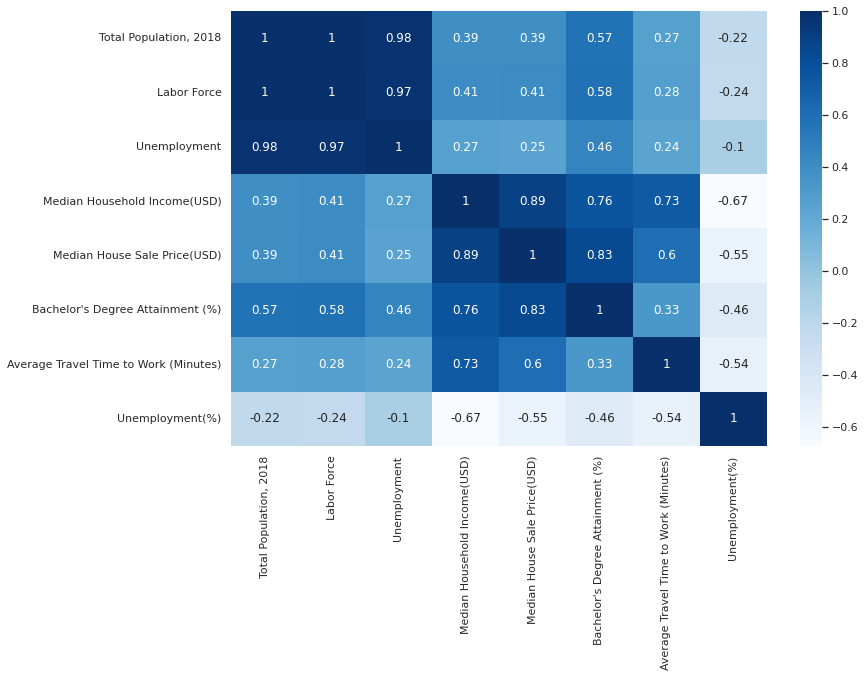

In [33]:
#Generating a heatmap for the correlation

sns.heatmap(corr_matrix, annot= True, cmap = "Blues")

#**Conclusion:**

1. Aside from the positve correlation between Bachelors degree attainment and Median household income, there is also a strong positive correlation between median sale price of homes and education, suggesting that with the rise in education, people tend to live a relatively more luxurious life.

2. There is a stong positive correlation between the Median Household income and Average Travel Time to Work, which could suggest that people of Maryland are commuting far distances for better paying jobs
